In [14]:
#cargando librerias necesarias
import pylab
import numpy as np
import matplotlib.pyplot as plt
import aplpy 
import astropy.coordinates as coord

from astropy.io import fits
from matplotlib.colors import LogNorm
from matplotlib import rcParams

In [15]:
#funcion para convertir RA a grados
def ra2deg(s):
    token = s.split(':') #split separa cada valor de hora, minutos y segundos
    deg = 15*(float(token[0])+float(token[1])/60.+float(token[2])/3600.)
    return(deg)

#funcion para convertir DEC a grados
def dec2deg(s):
    token = s.split(':') #split separa cada valor de grados, minutos de arco y segundos de arco
    deg = (abs(float(token[0]))+float(token[1])/60.+float(token[2])/3600.)
    if (token[0].find('-') >= 0):
        deg = -deg
    return(deg)

/usr/lib/python3/dist-packages/aplpy/core.py:1176: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  s = self.ax.scatter(xw, yw, transform=self.ax.get_transform(coords_frame), **kwargs)


INFO: Setting slices=[0] [aplpy.core]


ValueError: WCS has more than 2 pixel dimensions, so 'slices' should be set

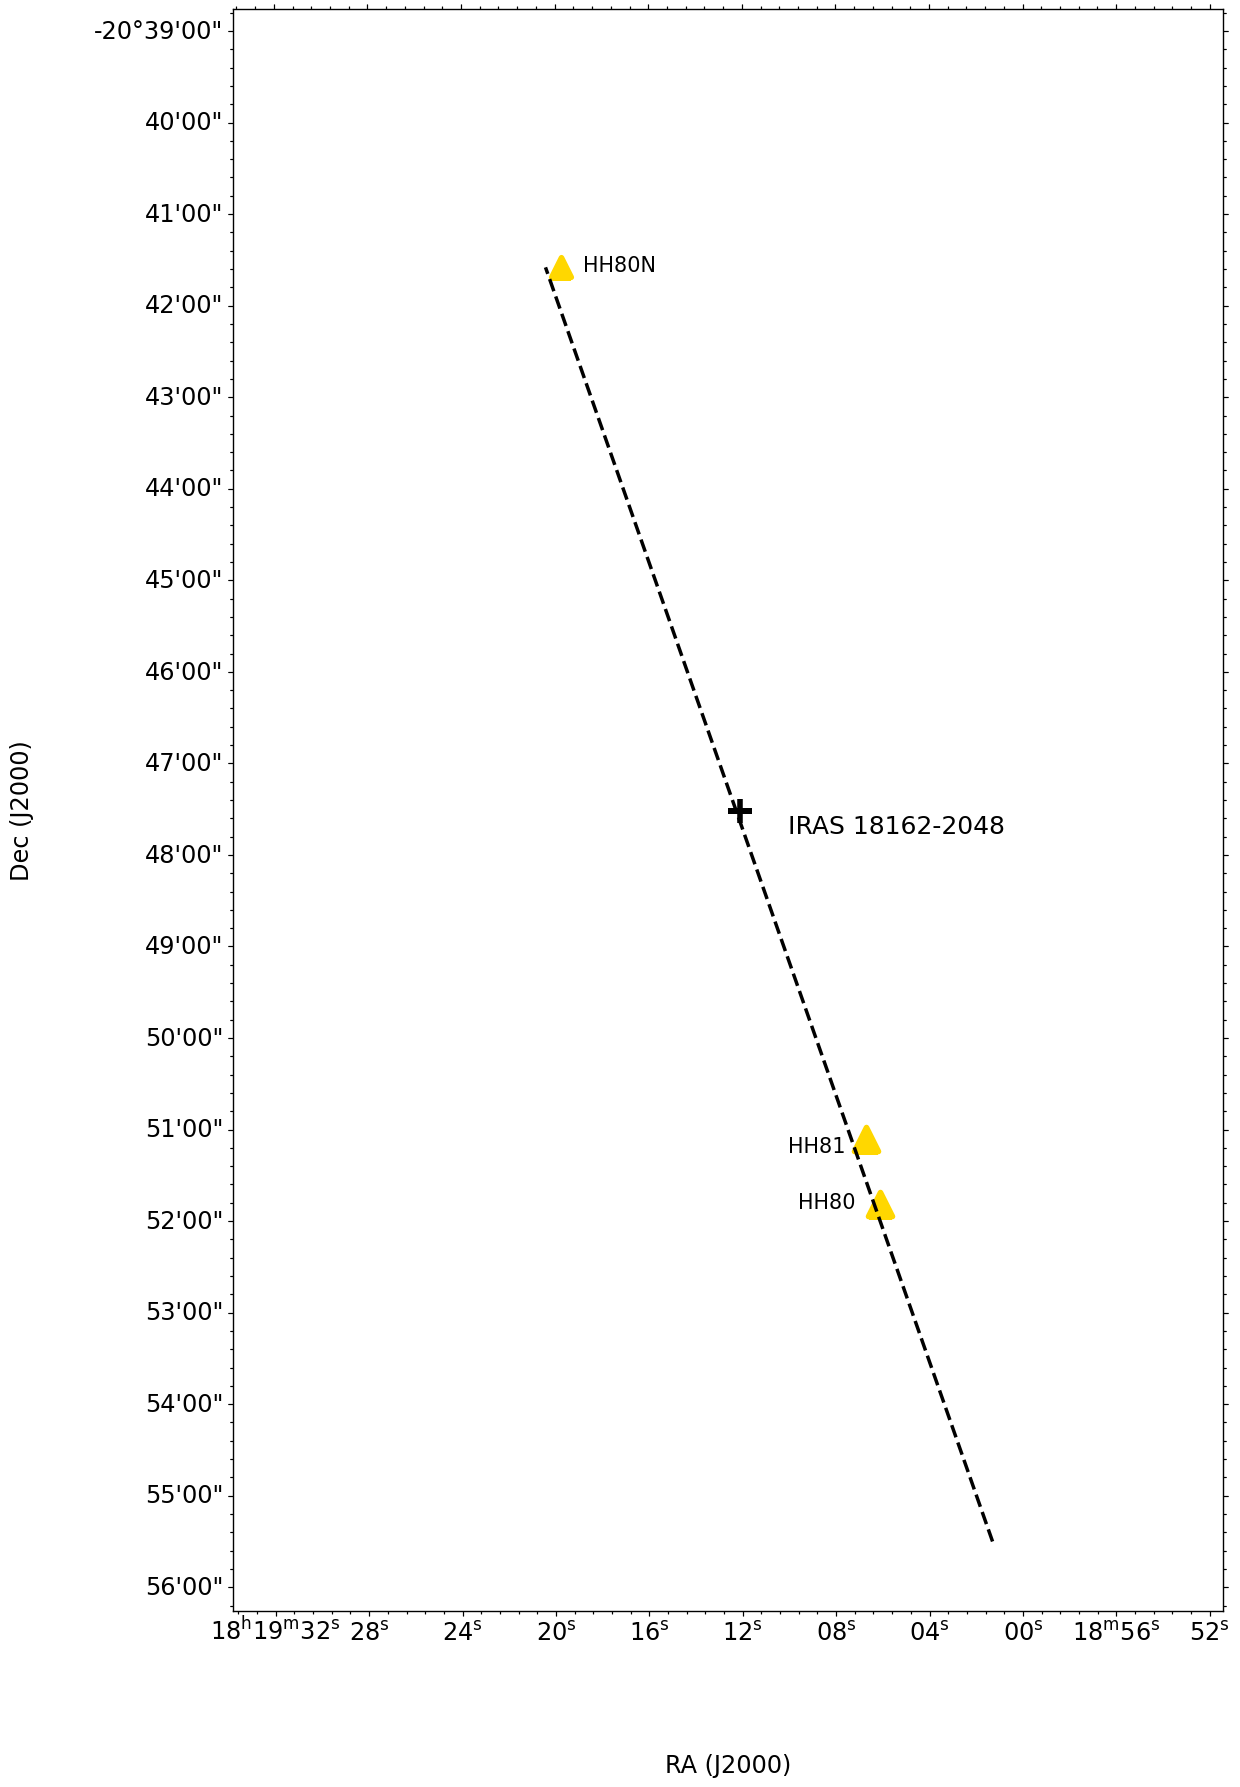

In [16]:
fig = plt.figure(figsize=(22, 18))
clev = 1000

f1 = aplpy.FITSFigure('DATA.fits', figure=fig, slices=[1,0], dimensions=[0, 1], subplot=[0.10,0.1,0.45,0.89])

#ejes y etiquetas
f1.ticks.set_color('black')
f1.axis_labels.set_xpad(5)
f1.axis_labels.set_ypad(3)
f1.axis_labels.set_font(size='xx-large')
f1.tick_labels.set_font(size='xx-large')

f1.tick_labels.set_xformat('hh:mm:ss')
f1.tick_labels.set_yformat('dd:mm:ss')

f1.ticks.set_xspacing(4/240)
f1.ticks.set_yspacing(1/60)
f1.ticks.set_minor_frequency(5)

#marcas en posicion de la fuente central, HH80N, objetos HH del sur 
f1.show_markers(ra2deg('18:19:06.1'), dec2deg('-20:51:49'), layer='marker_set_34', edgecolor='gold', facecolor='gold', marker='^', s=300, linewidth=4)
f1.show_markers(ra2deg('18:19:06.7'), dec2deg('-20:51:06'), edgecolor='gold', facecolor='gold', marker='^', s=300., linewidth=4, layer='marker_set_35')
f1.show_markers(ra2deg('18:19:12.101'), dec2deg('-20:47:31.0'), layer='marker_set_89', facecolor='black', marker='+', s=300., linewidth=4)
f1.show_markers(ra2deg('18:19:19.74'), dec2deg('-20:41:34.9'), layer='marker_set_10', edgecolor='gold', facecolor='gold', marker='^', s=200., linewidth=4)

#etiquetas
f1.add_label(0.59, 0.29, 'HH81', size=15, relative=True, color='black', layer='marker_set_11')
f1.add_label(0.60, 0.255, 'HH80', size=15, relative=True, color='black', layer='marker_set_12')
f1.add_label(0.39, 0.84, 'HH80N', size=15, relative=True, color='black', layer='marker_set_13')
f1.add_label(0.67, 0.49, 'IRAS 18162-2048', size=18, relative=True, color='black', layer='marker_set_14')

#beam
#f1.add_beam(major=10.67/3600., minor=10.67/3600., angle=0, color='black', corner ='bottom left')
#f1.beam.set_corner('bottom right')
#a.add_beam(major=0.5/3600., minor=0.5/3600., angle=0,color='black',fill=False)
#a.add_beam(major=0.082/3600., minor=0.066/3600., angle=-27.84,color='black', corner = 'top left')


#eje del radio-jet que impulsa el outflow
x1=ra2deg('18:19:1.3')
y1=dec2deg('-20:55:30')

x2=ra2deg('18:19:20.4')
y2=dec2deg('-20:41:34.9')

iline = np.array([[x1, x2],[y1,y2]])
f1.show_lines([iline], color = 'black', linewidths=2.5, linestyles='dashed', layer='marker_set_23')

#outflow estandar
clev = 1000
levs_8 = (5*clev, 7*clev, 9*clev, 11*clev, 13*clev, 15*clev, 17*clev, 19*clev, 21*clev, 23*clev, 25*clev, 27*clev, 29*clev, 31*clev, 33*clev, 35*clev, 37*clev, 39*clev, 41*clev, 43*clev, 45*clev, 47*clev, 49*clev, 51*clev, 53*clev, 55*clev, 57*clev, 59*clev, 61*clev, 63*clev, 65*clev)

f1.show_contour('BLUE_0.fits', slices=[1,0], dimensions=[0, 1], levels=levs_8, colors='blue', smooth=1, linewidths=0.8, layer='marker_set_24')
f1.show_contour('RED_0.fits', levels=levs_8, colors='red', slices=[1], smooth=1, linewidths=0.8, layer='marker_set_25')


f1.save('outflow_HH80.jpg')